In [187]:
def load_concat_csv(paths):
    
    header = ['first_kill', 'time', 'first_death', 'spike_plant', 'defuse', 'fb_team', 'fb_players', 'dt_players',
              'team_buy', 'oppo_buy', 'total_kills', 'total_deaths', 'awps_info', 'side', 'round_win']

    df = pd.DataFrame()
    for path in paths:
        data = pd.read_csv(path)
        df = pd.concat([df, data], axis=0)
    
    return df

# Practistics Analytics Template
This is a template made for use with Practistics scrim data. Instructions:
-- Load as many scrim CSVs (of the same map) as required into a directory.
-- Paste the file paths of all the CSVs into the read CSVs function. 
-- Execute all the cells for the required analytics each cell provides.

In [188]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install pandas -q

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

## Loading CSVs:
Enter all the file paths of the CSVs here, how many ever there are: 
(Make sure all the paths are inside the `[ ]` square brackets, surrounded by `' '` marks, and seperated by `,` commas)

**Example:**

>path_list = ['D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', 'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv']

In [104]:
path_list = [r'D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv', r'D:\PROJECTS\practistics-template\split_22_08_2023_time_12_56.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_10-13.csv']

df = load_concat_csv(path_list)

df.team_buy = df.team_buy.str.replace(',','')
df.oppo_buy = df.oppo_buy.str.replace(',','')
df.time = df.time.str.replace('0:0','')
df.time = df.time.str.replace('0:','')
df.time = df.time.str.replace('.','')

df.team_buy = df.team_buy.astype(int)
df.time = df.time.astype(int)
df.oppo_buy = df.oppo_buy.astype(int)

sepe = "------------------------------"

df.head()

,first_kill,time,first_death,spike_plant,defuse,fb_team,fb_players,dt_players,team_buy,oppo_buy,total_kills,total_deaths,awps_info,side,round_win
0,Raze,32,Cypher,B,True,team,BOIt OP,PavamaN,800,700,1,5,none,Attack,loss
1,Sage,38,Gekko,False,False,opponent,Sasta rossi,bhooka,600,2600,0,5,none,Attack,loss
2,Sage,9,Viper,A,True,opponent,Sasta rossi,SadScientist,4200,3200,4,5,none,Attack,loss
3,Raze,7,Raze,False,False,team,BOIt OP,BOIt OP,3300,4600,6,4,none,Attack,win
4,Raze,4,Raze,B,False,opponent,BOIt OP,tam0w,3900,3400,5,4,none,Attack,win


# Analytics:

We will now run different standard queries on the given loaded dataset to give us various bits of information regarding scrim performances.

## Basics Stats:
Basic computations performed on your dataset based on the whole map.


In [105]:
win_percent = float("{:.2f}".format((df['round_win'].value_counts()[1] / df['round_win'].count() * 100)))
print(f"Round Win %: {win_percent}%")

print(sepe)

attack_win_pct = float("{:.2f}".format((df[df['side'] == "Attack"]['round_win'].value_counts()[1] / df[df['side'] == "Attack"]['round_win'].count() * 100)))
print(f"Attack Win %: {attack_win_pct}%")

def_win_pct = float("{:.2f}".format((df[df['side'] == "Defense"]['round_win'].value_counts()[1] / df[df['side'] == "Defense"]['round_win'].count() * 100)))
print(f"Defense Win %: {def_win_pct}%")

print(sepe)

anti_ecos_lost = df.query('team_buy >= 3500 & oppo_buy <= 2700')['round_win'].value_counts()['loss']
total_ecos_opp = df.query('team_buy >= 3500 & oppo_buy <= 2000')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(anti_ecos_lost / total_ecos_opp * 100))
print(f"Anti-Eco Loss %: {eco_wins_pct}% ({anti_ecos_lost}/{total_ecos_opp})")

eco_wins = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].value_counts()['win']
total_ecos_team = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].count()
eco_wins_pct = float("{:.2f}".format(eco_wins / total_ecos_team * 100))
print(f"Eco Win %: {eco_wins_pct}% ({eco_wins}/{total_ecos_team})")

print(sepe)

post_plants_wins = df.query('spike_plant == "A"| spike_plant == "B"')['round_win'].value_counts()['win']
total_post_plants = df.query('spike_plant == "A"| spike_plant == "B"')['round_win'].count()
pp_win_pct = float("{:.2f}".format(post_plants_wins / total_post_plants * 100))
print(f"Post-Plant Win %: {pp_win_pct}% ({post_plants_wins}/{total_post_plants})")

retake_wins = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].value_counts()['win']
total_retakes = df.query('oppo_buy >= 3500 & team_buy <= 2700')['round_win'].count()
retake_win_pct = float("{:.2f}".format(retake_wins / total_retakes * 100))
print(f"Eco Win %: {retake_wins}% ({retake_wins}/{total_retakes})")


Round Win %: 40.74%
------------------------------
Attack Win %: 39.13%
Defense Win %: 42.86%
------------------------------
Anti-Eco Loss %: 50.0% (6/12)


KeyError: 'win'

Winrate when the first kill is in the first 10 seconds: 85.71% (12/14)
Winrate when the first kill is between 10-20 seconds of the round: 50.0% (6/12)
Winrate when the first kill is after 20 seconds: 44.44% (4/9)


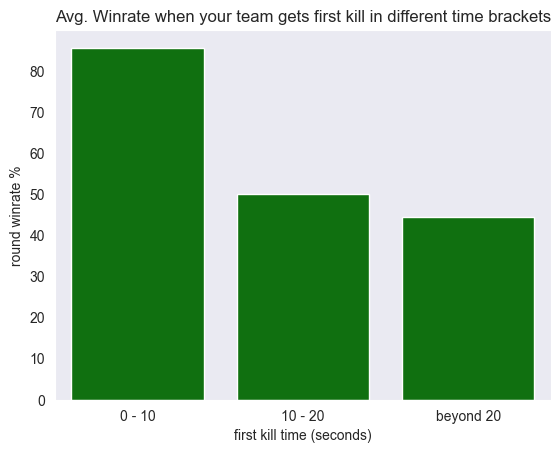

In [255]:
early = df.query('time <= 10 & fb_team == "team"')
early_wins = early.round_win.value_counts()['win']
early_total = early.round_win.count()
early_win_pct = float("{:.2f}".format((early_wins / early_total) * 100))
print(f'Winrate when the first kill is in the first 10 seconds: {early_win_pct}% ({early_wins}/{early_total})')

mid = df.query('20 > time > 10 & fb_team == "team"')
mid_wins = mid.round_win.value_counts()['win']
mid_total = mid.round_win.count()
mid_win_pct = float("{:.2f}".format((mid_wins / mid_total) * 100))
print(f'Winrate when the first kill is between 10-20 seconds of the round: {mid_win_pct}% ({mid_wins}/{mid_total})')

late = df.query('time >= 20 & fb_team == "team"')
late_wins = late.round_win.value_counts()['win']
late_total = late.round_win.count()
late_win_pct = float("{:.2f}".format((late_wins / late_total) * 100))
print(f'Winrate when the first kill is after 20 seconds: {late_win_pct}% ({late_wins}/{late_total})')

sns.barplot(y=[early_win_pct,mid_win_pct,late_win_pct], x=['0 - 10','10 - 20','beyond 20'], color='green',)
plt.xlabel('first kill time (seconds)')
plt.ylabel('round winrate %')
plt.title('Avg. Winrate when your team gets first kill in different time brackets')
plt.show()

## Site-Based Stats:

## A-Site Stats:



In [107]:
a_def_won = df.query('side == "Defense" & spike_plant == "A"')['round_win'].value_counts()['win']
a_plants = df.query('side == "Defense" & spike_plant == "A"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "A" | spike_plant == "B")')['round_win'].count()
a_retake_pct = float("{:.2f}".format(a_def_won / a_plants * 100))
a_concede_pct = float("{:.2f}".format(a_plants / plants * 100))
print(f"A Retake %: {a_retake_pct}% ({a_def_won}/{a_plants})")
print(f"A Site Concede %: {a_concede_pct}% ({a_plants}/{plants})")

A Retake %: 8.33% (1/12)
A Site Concede %: 70.59% (12/17)


## B-Site Stats:

In [108]:
b_def_won = df.query('side == "Defense" & spike_plant == "B"')['round_win'].value_counts()['win']
b_plants = df.query('side == "Defense" & spike_plant == "B"')['round_win'].count()
plants = df.query('side == "Defense" & (spike_plant == "B" | spike_plant == "B")')['round_win'].count()
b_retake_pct = float("{:.2f}".format(b_def_won / b_plants * 100))
b_concede_pct = float("{:.2f}".format(b_plants / plants * 100))
print(f"B Retake %: {b_retake_pct}% ({b_def_won}/{b_plants})")
print(f"B Site Concede %: {b_concede_pct}% ({b_plants}/{plants})")

KeyError: 'win'

In [198]:
df.time.describe()

count    81.000000
mean     13.209877
std      10.127581
min       2.000000
25%       7.000000
50%      10.000000
75%      16.000000
max      53.000000
Name: time, dtype: float64

1) Attack Side vs Def Side Win rate

In [ ]:
sns.set_palette("husl") 
sns.scatterplot(df, x=df['oppo_buy'],y=df['team_buy'],hue=df['round_win'])
plt.xlabel('opponent buy')
plt.ylabel('team buy')
plt.title('Distribution of every round won or lost based on economies')

In [254]:
df.query('fb_team == "team"')

,first_kill,time,first_death,spike_plant,defuse,fb_team,fb_players,dt_players,team_buy,oppo_buy,total_kills,total_deaths,awps_info,side,round_win,counts
0,Raze,32,Cypher,B,True,team,BOIt OP,PavamaN,800,700,1,5,none,Attack,loss,"(30.0, 35.0]"
3,Raze,7,Raze,False,False,team,BOIt OP,BOIt OP,3300,4600,6,4,none,Attack,win,"(5.0, 10.0]"
5,Raze,9,Cypher,B,False,team,BOIt OP,PavamaN,3800,4000,5,1,none,Attack,win,"(5.0, 10.0]"
6,Raze,16,Cypher,B,True,team,BOIt OP,PavamaN,4300,900,2,5,none,Attack,loss,"(15.0, 20.0]"
7,Viper,20,Sage,False,False,team,NaN,Sasta rossi,4500,4900,2,5,none,Attack,loss,"(15.0, 20.0]"
12,Gekko,16,KAYIO,False,False,team,NaN,MA DMAN,800,700,5,4,none,Defense,win,"(15.0, 20.0]"
13,Viper,11,Sage,False,False,team,NaN,Sasta rossi,2900,200,5,0,none,Defense,win,"(10.0, 15.0]"
14,Raze,14,KAYIO,False,False,team,BOIt OP,MA DMAN,3500,4200,4,5,none,Defense,loss,"(10.0, 15.0]"
15,Reyna,53,Cypher,False,False,team,NaN,PavamaN,4100,3400,5,0,none,Defense,win,NaN
16,Raze,40,KAYIO,False,False,team,BOIt OP,MA DMAN,4500,600,5,1,none,Defense,win,"(35.0, 40.0]"


<Axes: xlabel='Value', ylabel='Frequency'>

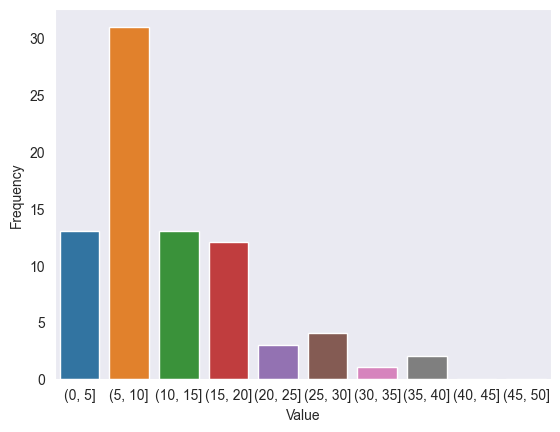

In [154]:
df['counts'] = pd.cut(df['time'], bins=[0,5,10,15,20,25,30,35,40,45,50])

test = df.counts.value_counts().sort_index().reset_index()
test
test = pd.DataFrame(test)
test.columns = ['Seconds', 'Frequency']
test.dtypes
# print(test)
sns.barplot(data=test,x=test.Value, y=test.Frequency)
# 
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Series Plot')
# 
# # Show the plot
# plt.show()